1. Background of Project
2. Hypotheses
3. Summary of Findings and Insights
4. Data Acquisition and Prep
5. Exploratory Data Analysis
6. Feature Engineering
7. Modeling
8. Evaluation

Notes:
- Image use footnote
    - PBS KIDS and the PBS KIDS Logo are registered trademarks of PBS. Used with permission. The contents of PBS KIDS Measure Up! were developed under a grant from the Department of Education. However, those contents do not necessarily represent the policy of the Department of Education, and you should not assume endorsement by the Federal Government. The app is funded by a Ready To Learn grant (PR/AWARD No. U295A150003, CFDA No. 84.295A) provided by the Department of Education to the Corporation for Public Broadcasting.

# Child Learning and Development with PBS KIDS Measure Up! App

![title](mu_image.jpeg)

## I. BACKGROUND

### MEASURE UP! APP  
The PBS KIDS Measure Up! app is designed for children ages 3-5 to develop their comprehension on early STEM concepts. The app takes users to an adventure through three worlds, **Magma Peak** which focuses on capacity and displacement, **Crystal Caves** which is about weight, and finally **Treetop City** which teaches the concepts of length and height.

### 2019 KAGGLE DATA SCIENCE BOWL COMPETITION PRESENTED BY PBS KIDS & BOOZ ALLEN HAMILTON
This year's competition is focused on early childhood education through multimedia learning. Anonymized Measure Up! gameplay data was provided by PBS KIDS. The end product of each submission is to provide a model that predicts the accuracy group of users.

Accuracy group is based on the number of attempts a user makes until s/he completes the "challenge" (a.k.a. assessment). Based on user's performance on each completed assessment, an accuracy group is assigned:
 - 3 - Successfully completed the assessment on 1 attempt
 - 2 - Completed assessment on 2 attempts
 - 1 - Completed assessment on 3 attempts
 - 0 - Completed assessment on more than 3 attempts

The model will help PBS KIDS to improve game design and to discover relationships on game engagement and learning processes.

### THE PROJECT
The project is inspired by 2019's Kaggle Data Science Bowl. By analyzing data publicly provided by PBS KIDS on Kaggle, our team has sought to identify and understand drivers of children’s success on assessments (a.k.a. "challenges") in the app. The insights inform teachers and parents on how well using the different activities in the application prepare 3-5-year old children for the application’s final assessments.

A presentation documenting our findings and recommendations is delivered on Jan 30, 2020.

### PROBLEM STATEMENTS & HYPOTHESES:

**Problem 1:** What are the drivers of users assessment accuracy?  
**Hypothesis:** Historical Performance and Time drive assessment performance.
  
**Problem 2:** Is there a certain path that better prepare users in assessments - with the two paths being, linear progression and random (choose activities at their own will)  
**Hypothesis:** There is no difference in the performance between users who followed a linear progression and those who had random learning path.

> Linear Progression and their corresponding in-game activities are as follows:  
**Exposure** (video clip) → **Exploration** (activity) → **Practice** (game) → **Demonstration** (assessment)

### SUMMARY OF FINDINGS AND INSIGHTS

### CONCLUSION AND RECOMMENDATION




---

## II. MODULES & LIBRARIES

In [456]:
import pandas as pd
import numpy as np

#viz
import matplotlib.pyplot as plt
import seaborn as sns

#feature engineering
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV

#modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

---
## III. DATA ACQUISITION & PREP

---
## IV. EXPLORATORY DATA ANALYSIS 

### Feature Selection

In [161]:
big = pd.read_csv("train_maybe_final.csv")

In [192]:
big.installation_id.nunique()

3485

In [162]:
big.head()

,Unnamed: 0,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,num_correct,num_incorrect,accuracy,accuracy_group,date,hour,weekday
0,0,27253bdc,34ba1a28d02ba8ba,2019-08-06 04:57:18.904000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
1,1,27253bdc,4b57c9a59474a1b9,2019-08-06 04:57:45.301000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
2,2,77261ab5,2b9d5af79bcdb79f,2019-08-06 04:58:14.538000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0006a69f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
3,3,b2dba42b,2b9d5af79bcdb79f,2019-08-06 04:58:14.615000+00:00,"{""description"":""Let's build a sandcastle! Firs...",0006a69f,2,3010,29,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
4,4,1325467d,2b9d5af79bcdb79f,2019-08-06 04:58:16.680000+00:00,"{""coordinates"":{""x"":273,""y"":650,""stage_width"":...",0006a69f,3,4070,2137,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday


In [163]:
assessment = big[big.type == "Assessment"]

#### MAX CEILING

In [227]:
mc = assessment.groupby(["installation_id","game_session"])[["accuracy"]].max().sort_values(by=["installation_id","accuracy"],ascending=False).reset_index()
mc = mc.drop_duplicates(subset="installation_id",keep="first")

max_ceiling = mc[["installation_id","accuracy"]].set_index("installation_id").rename(columns={"accuracy":"max_ceiling"})

In [228]:
max_ceiling.shape

(2496, 1)

#### LOWEST POSSIBLE SCORE

In [230]:
ls = assessment.groupby(["installation_id","game_session"])[["accuracy"]].min().sort_values(by=["installation_id","accuracy"],ascending=True).reset_index()
ls = ls.drop_duplicates(subset="installation_id",keep="first")

lowest_score = ls[["installation_id","accuracy"]].set_index("installation_id").rename(columns={"accuracy":"low_score"})

In [231]:
lowest_score.shape

(2496, 1)

#### MEDIAN SCORE

In [232]:
md = assessment.groupby(["installation_id","game_session"])[["accuracy"]].median().sort_values(by=["installation_id","accuracy"]).reset_index()
md = md.drop_duplicates(subset="installation_id",keep="first")

median_score = md[["installation_id","accuracy"]].set_index("installation_id").rename(columns={"accuracy":"median_score"})

In [233]:
median_score.shape

(2496, 1)

#### NUMBER OF ACTIONS

In [255]:
actions = assessment.groupby(['installation_id','game_session'])[['event_id']].count().reset_index().groupby("installation_id").sum().reset_index()

actions = actions[["installation_id","event_id"]].set_index("installation_id").rename(columns={"event_id":"no_actions"})

In [257]:
actions.shape

(2496, 1)

#### NUMBER OF INCORRECT

In [267]:
no_incorrect = assessment.groupby(['installation_id','game_session'])[['num_incorrect']].count().reset_index().groupby("installation_id").sum()

In [268]:
no_incorrect.shape

(2496, 1)

#### ACCURACY TENDENCY

In [349]:
tendency = assessment.groupby(['installation_id','game_session',"accuracy"])[['accuracy']].count().rename(columns={"accuracy":"acc"}).sort_values(by=["installation_id","acc"],ascending=False).reset_index()

tendency = tendency.drop_duplicates(subset="installation_id",keep="first")
tendency = tendency[["installation_id","accuracy"]]

In [350]:
condition_list = [tendency.accuracy == 0, tendency.accuracy == 0.5,tendency.accuracy == 1, (~tendency.accuracy.isin([0,1,0.5]))]
choice_list = ["low_scorer","avg_scorer","high_scorer","random_scorer"]

tendency["group"] = np.select(condition_list,choice_list,0)

In [351]:
tendency = pd.get_dummies(tendency,columns=["group"], prefix="tendency")
tendency = tendency[['installation_id','tendency_avg_scorer','tendency_high_scorer', 'tendency_low_scorer','tendency_random_scorer']].set_index("installation_id")

In [355]:
tendency.shape

(2496, 4)

In [353]:
qu = max_ceiling.join([lowest_score,median_score,actions,no_incorrect,tendency])

In [354]:
qu.head()

,max_ceiling,low_score,median_score,no_actions,num_incorrect,tendency_avg_scorer,tendency_high_scorer,tendency_low_scorer,tendency_random_scorer
installation_id,,,,,,,,,
ffeb0b1b,0.333333,0.000000,0.000000,186,186,0,0,1,0
ffc90c32,1.000000,0.333333,0.333333,204,204,0,0,0,1
ff9715db,1.000000,0.000000,0.000000,329,329,0,0,1,0
ff9305d7,0.076923,0.000000,0.000000,330,330,0,0,0,1
ff90db99,1.000000,0.333333,0.333333,273,273,0,0,0,1


In [356]:
qu.to_csv("cris_df.csv")

---
## V. TEST-TRAIN SPLIT & FEATURE ENGINEERING 

Acquire "tidy" data frames with features and y for feature engineering.

In [357]:
# Features on separate data frames
qu = pd.read_csv("cris_df.csv")
be = pd.read_csv("beta.csv")

In [358]:
qu.set_index("installation_id",inplace=True)
be.set_index("installation_id",inplace=True)

In [364]:
print(f"shape:{be.shape}")
be.head()

shape:(3523, 44)


,0.0,1.0,2.0,3.0,Activity,Assessment,Clip,Game,accuracy_group,assesments_CC,...,bird_min,cart_min,cauld_min,chest_min,shroom_min,bird_max,cart_max,cauld_max,chest_max,shroom_max
installation_id,,,,,,,,,,,,,,,,,,,,,
0006a69f,1.0,0.0,1.0,2.0,10.0,4.0,28.0,13.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,1.0
0006c192,1.0,0.0,0.0,1.0,8.0,2.0,30.0,6.0,2.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
00129856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001d0ed0,1.0,0.0,1.0,2.0,1.0,4.0,19.0,3.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.5,0.0,1.0,0.0,0.0,1.0
00225f67,0.0,0.0,0.0,0.0,3.0,0.0,10.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [361]:
print(f"shape:{qu.shape}")
qu.head()

shape:(2496, 9)


,max_ceiling,low_score,median_score,no_actions,num_incorrect,tendency_avg_scorer,tendency_high_scorer,tendency_low_scorer,tendency_random_scorer
installation_id,,,,,,,,,
ffeb0b1b,0.333333,0.000000,0.000000,186,186,0,0,1,0
ffc90c32,1.000000,0.333333,0.333333,204,204,0,0,0,1
ff9715db,1.000000,0.000000,0.000000,329,329,0,0,1,0
ff9305d7,0.076923,0.000000,0.000000,330,330,0,0,0,1
ff90db99,1.000000,0.333333,0.333333,273,273,0,0,0,1


#### MERGING WITH BETA

In [480]:
features = be.join(qu,how="left")
features = features.copy().drop(columns="accuracy_group")
features.head()

,0.0,1.0,2.0,3.0,Activity,Assessment,Clip,Game,assesments_CC,assessments_MP,...,shroom_max,max_ceiling,low_score,median_score,no_actions,num_incorrect,tendency_avg_scorer,tendency_high_scorer,tendency_low_scorer,tendency_random_scorer
installation_id,,,,,,,,,,,,,,,,,,,,,
0006a69f,1.0,0.0,1.0,2.0,10.0,4.0,28.0,13.0,0.0,0.0,...,1.0,1.0,0.0,0.0,212.0,212.0,0.0,0.0,1.0,0.0
0006c192,1.0,0.0,0.0,1.0,8.0,2.0,30.0,6.0,0.0,1.0,...,0.0,1.0,0.0,0.0,140.0,140.0,0.0,0.0,1.0,0.0
00129856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
001d0ed0,1.0,0.0,1.0,2.0,1.0,4.0,19.0,3.0,1.0,0.0,...,1.0,1.0,0.0,0.0,165.0,165.0,1.0,0.0,0.0,0.0
00225f67,0.0,0.0,0.0,0.0,3.0,0.0,10.0,3.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### REMOVE NA_USERS ON TRAIN

In [493]:
na_users = list(features[features.max_ceiling.isna()].index)

In [500]:
features = features[~features.index.isin(na_users)]

In [502]:
# Data Frame with accuracy group, i.e., the "y" or target
y = pd.read_csv("last_assessments.csv")
y = y[["installation_id","accuracy_group"]].set_index("installation_id")
y = y[~y.index.isin(na_users)]

In [505]:
print(f"Features Shape: {features.shape}")
print(f"y Shape: {y.shape}")

Features Shape: (2496, 52)
y Shape: (2496, 1)


### Scale

In [506]:
scaler = StandardScaler()
scaled_features = pd.DataFrame(scaler.fit_transform(features),columns=features.columns).set_index(features.index)

In [507]:
scaled_features.head()

,0.0,1.0,2.0,3.0,Activity,Assessment,Clip,Game,assesments_CC,assessments_MP,...,shroom_max,max_ceiling,low_score,median_score,no_actions,num_incorrect,tendency_avg_scorer,tendency_high_scorer,tendency_low_scorer,tendency_random_scorer
installation_id,,,,,,,,,,,,,,,,,,,,,
0006a69f,0.031579,-0.59679,0.502289,-0.129527,0.245140,-0.103358,0.217640,0.306918,-0.891850,-0.755458,...,1.109492,0.476905,-0.832402,-0.832402,-0.009935,-0.009935,-0.382107,-0.6742,1.541926,-0.598947
0006c192,0.031579,-0.59679,-0.616099,-0.534665,0.032685,-0.602836,0.297591,-0.213912,-0.891850,-0.001510,...,-0.984737,0.476905,-0.832402,-0.832402,-0.344154,-0.344154,-0.382107,-0.6742,1.541926,-0.598947
001d0ed0,0.031579,-0.59679,0.502289,-0.129527,-0.710905,-0.103358,-0.142141,-0.437125,-0.402068,-0.755458,...,1.109492,0.476905,-0.832402,-0.832402,-0.228106,-0.228106,2.617070,-0.6742,-0.648539,-0.598947
002db7e3,0.693935,0.41310,1.620676,0.275610,0.776276,0.895599,0.657372,0.158109,0.577495,-0.001510,...,1.109492,0.476905,-0.832402,-0.832402,0.881317,0.881317,-0.382107,-0.6742,-0.648539,1.669598
003372b0,0.031579,-0.59679,0.502289,0.275610,0.032685,0.146382,0.177664,0.158109,0.577495,-0.755458,...,1.109492,0.476905,-0.832402,-0.832402,-0.060996,-0.060996,-0.382107,-0.6742,1.541926,-0.598947


In [508]:
scaled_features.columns

Index(['0.0', '1.0', '2.0', '3.0', 'Activity', 'Assessment', 'Clip', 'Game',
       'assesments_CC', 'assessments_MP', 'Assessments_TTC',
       'max_accuracy_group', 'median_accuracy_group', 'low_accuracy_group',
       'avg_no_actions', 'CRYSTALCAVES', 'MAGMAPEAK', 'NONE', 'TREETOPCITY',
       'activity_mins', 'assessment_mins', 'clip_mins', 'game_mins',
       'bird_med', 'cart_med', 'cauld_med', 'chest_med', 'shroom_med',
       'bird_mean', 'cart_mean', 'cauld_mean', 'chest_mean', 'shroom_mean',
       'bird_min', 'cart_min', 'cauld_min', 'chest_min', 'shroom_min',
       'bird_max', 'cart_max', 'cauld_max', 'chest_max', 'shroom_max',
       'max_ceiling', 'low_score', 'median_score', 'no_actions',
       'num_incorrect', 'tendency_avg_scorer', 'tendency_high_scorer',
       'tendency_low_scorer', 'tendency_random_scorer'],
      dtype='object')

In [509]:
df_feed = scaled_features.copy()

### Train-Test Split

In [510]:
X_train, X_test, y_train, y_test = train_test_split(df_feed,y, test_size=0.3, stratify=y["accuracy_group"],random_state=123)

### Feature Engineering

In [511]:
lasso = LassoCV()
lasso.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [512]:
print(f"Best alpha using built-in LassoCV: {lasso.alpha_}")
print(f"Best score using built-in LassoCV: {lasso.score(X_train,y_train)}")

Best alpha using built-in LassoCV: 0.018833088932084775
Best score using built-in LassoCV: 0.13536315388301523


In [513]:
coef = pd.DataFrame(lasso.coef_, index = X_train.columns).rename(columns={0:"feature_weights"}).sort_values(by="feature_weights",ascending=False)

In [514]:
coef.head()

,feature_weights
max_accuracy_group,0.163489
bird_max,0.106207
shroom_min,0.085145
MAGMAPEAK,0.081554
chest_mean,0.057380


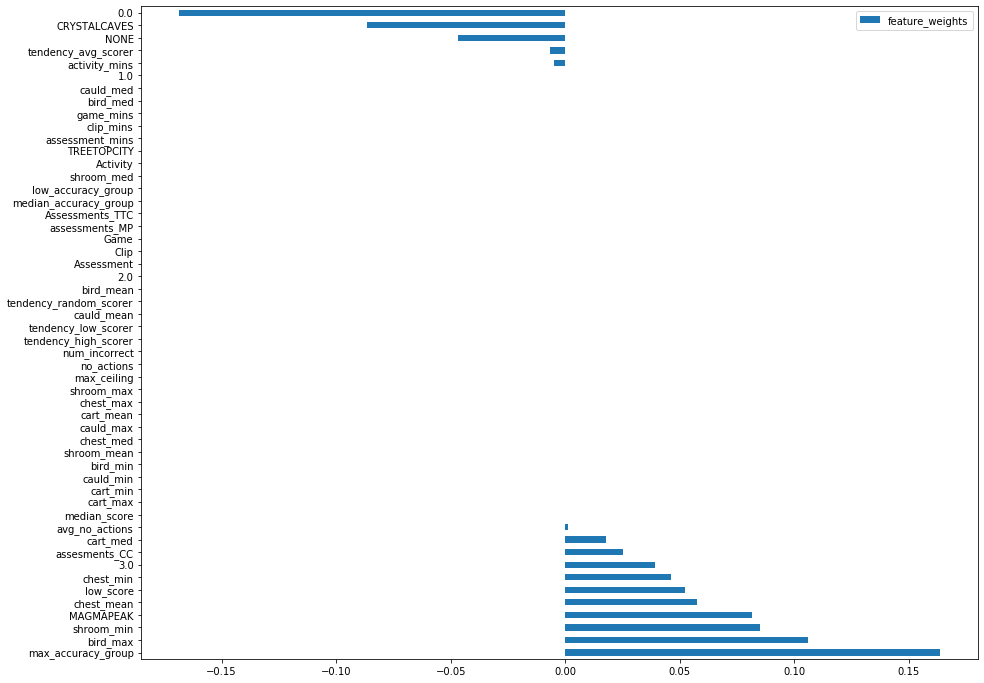

In [515]:
coef.plot(kind="barh",figsize=(15,12))

### Keep all non-zero features

In [516]:
weighted_coef = coef[coef.feature_weights != 0]

In [517]:
#see if all zero-value features are removed
weighted_coef.describe()

,feature_weights
count,17.000000
mean,0.021304
std,0.076288
min,-0.168813
25%,-0.004984
50%,0.025451
75%,0.057380
max,0.163489


In [518]:
weighted_coef_list = list(weighted_coef.index)

In [519]:
X_train.head()

,0.0,1.0,2.0,3.0,Activity,Assessment,Clip,Game,assesments_CC,assessments_MP,...,shroom_max,max_ceiling,low_score,median_score,no_actions,num_incorrect,tendency_avg_scorer,tendency_high_scorer,tendency_low_scorer,tendency_random_scorer
installation_id,,,,,,,,,,,,,,,,,,,,,
f30f1e87,2.681005,-0.59679,-0.616099,-0.129527,0.776276,0.645860,2.136470,0.678939,1.067276,-0.001510,...,1.109492,0.476905,-0.832402,-0.832402,0.547098,0.547098,-0.382107,-0.67420,1.541926,-0.598947
88812720,0.693935,-0.59679,0.502289,0.275610,-0.073542,0.396121,-0.142141,0.083705,0.087713,2.260332,...,-0.984737,0.476905,-0.832402,-0.832402,0.124681,0.124681,-0.382107,-0.67420,1.541926,-0.598947
b7ce4c4b,-0.630778,-0.59679,-0.616099,-0.534665,-0.392224,-0.852575,-0.262068,-0.213912,-0.402068,-0.755458,...,-0.984737,0.476905,1.620983,1.620983,-0.877977,-0.877977,-0.382107,1.48324,-0.648539,-0.598947
91c1fa97,0.693935,0.41310,-0.616099,-0.129527,0.457594,0.146382,0.377542,0.753344,0.087713,-0.001510,...,-0.286661,0.476905,-0.832402,-0.832402,0.370704,0.370704,-0.382107,-0.67420,1.541926,-0.598947
ae736213,-0.630778,-0.59679,-0.616099,-0.534665,-0.498451,-0.852575,-0.661824,-0.511530,-0.891850,-0.001510,...,-0.984737,0.476905,1.620983,1.620983,-0.836200,-0.836200,-0.382107,1.48324,-0.648539,-0.598947


In [520]:
X_train = X_train[weighted_coef_list]
X_test = X_test[weighted_coef_list]

In [521]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (1747, 17)
X_test shape: (749, 17)


---
## VI. MODELING

### Random Forest

Create Random Forest object.  
Fit Train data.

In [522]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=6, 
                            random_state=600)

rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=600,
                       verbose=0, warm_start=False)

Look at how the algorithm use features, that is, check feature importance.

In [523]:
rf_features = pd.DataFrame([rf.feature_importances_],columns = X_train.columns).T.rename(columns = {0: 'feature_importance'}).sort_values(by='feature_importance', ascending=False)

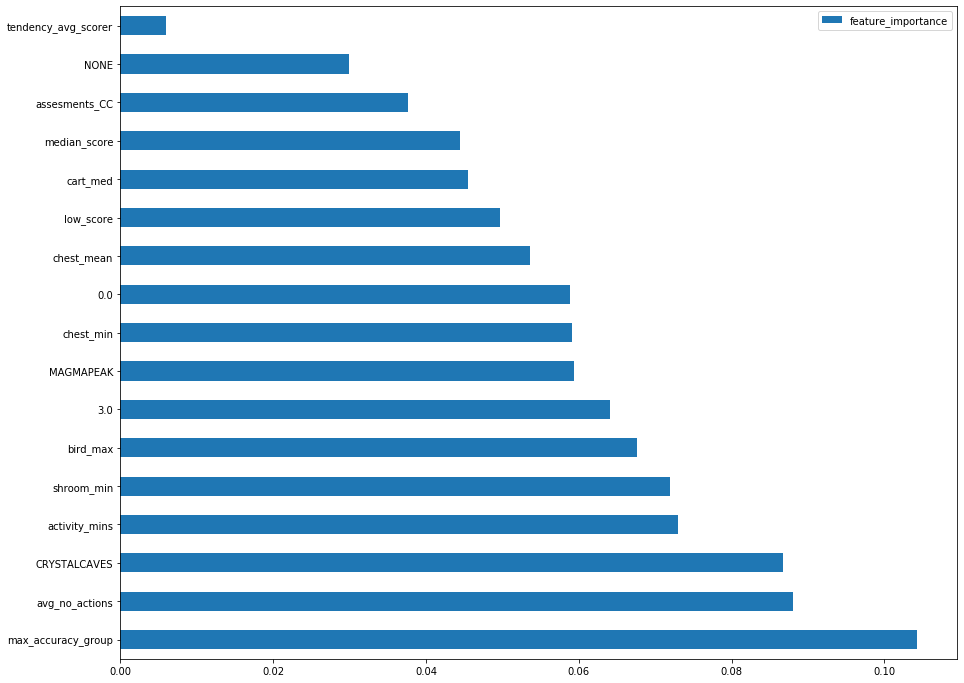

In [524]:
rf_features.plot(kind="barh",figsize=(15,12))

In [525]:
y_pred = pd.DataFrame(rf.predict(X_train),index = X_train.index)
y_pred_test = pd.DataFrame(rf.predict(X_test),index = X_test.index)

In [526]:
y_train.head()

,accuracy_group
installation_id,
f30f1e87,1.0
88812720,3.0
b7ce4c4b,3.0
91c1fa97,1.0
ae736213,3.0


In [527]:
predictions = y_train.copy().rename(columns={"accuracy_group":"actual_y"})
predictions[["predicted_y"]] = y_pred

In [528]:
predictions.head()

,actual_y,predicted_y
installation_id,,
f30f1e87,1.0,0.0
88812720,3.0,3.0
b7ce4c4b,3.0,3.0
91c1fa97,1.0,3.0
ae736213,3.0,3.0


#### EVALUATION: RANDOM FOREST

In [529]:
print(f"RF Score for Train: {rf.score(X_train, y_train)}")
print(f"RF Score for Test: {rf.score(X_test, y_test)}")

RF Score for Train: 0.544361763022324
RF Score for Test: 0.48731642189586116


In [530]:
confusion_matrix(predictions.actual_y, predictions.predicted_y)

array([[236,   0,   0, 241],
       [ 35,   6,   0, 217],
       [ 33,   0,   0, 204],
       [ 66,   0,   0, 709]])

In [437]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

         0.0       0.50      0.34      0.40       300
         1.0       0.00      0.00      0.00       144
         2.0       0.00      0.00      0.00       136
         3.0       0.49      0.88      0.63       477

    accuracy                           0.49      1057
   macro avg       0.25      0.30      0.26      1057
weighted avg       0.36      0.49      0.40      1057



### Logistic Regression

In [ ]:
logit = LogisticRegression(C=1, class_weight={1:2}, random_state = 123, solver='saga')